#### HARI ORASATH S

# Lab 15. Text dataset creation and design of Simple RNN for Sentiment Analysis

### 1. Import libraries

In [1]:
import csv
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Embedding,SimpleRNN

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

### 2. Creation of data

In [5]:
df = pd.read_csv("textdataset.csv",encoding="ISO-8859-1")

In [6]:
df.head()

,Text,Class
0,You will succeed if you don't quit.,1
1,All our dreams can come true.,1
2,Champions keep playing to get it right.,1
3,"Believe in yourself, you're braver than you th...",1
4,Success comes to those who seek it out.,1


### 3. Opening your CSV file

In [7]:
import csv

In [8]:
file = open('textdataset.csv')
type(file)

_io.TextIOWrapper

In [9]:
import csv
encodings_to_try = ['utf-8', 'ISO-8859-1', 'windows-1252', 'latin-1', 'utf-16']
for encoding in encodings_to_try:
    try:
        with open('textdataset.csv', 'r', encoding=encoding) as file:
            csvreader = csv.reader(file)
            rows = []
            for row in csvreader:
                rows.append(row)
        break  
    except UnicodeDecodeError:
        continue

In [10]:
file.close()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    40 non-null     object
 1   Class   40 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes


### 4. Pre-processing the text

In [12]:
X = df['Text']
y = df['Class']

### 5. Dataset Preparation

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25,stratify=y)

In [14]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(30,)
(10,)
(30,)
(10,)


In [15]:
# 4th step to be continue
train_token = Tokenizer(num_words=100,oov_token='<oov>')
train_token.fit_on_texts(X_train)
word_index = train_token.word_index
train_sequence = train_token.texts_to_sequences(X_train)
dict(list(word_index.items())[0:10])

{'<oov>': 1,
 'is': 2,
 'you': 3,
 'a': 4,
 'your': 5,
 'to': 6,
 'the': 7,
 'yourself': 8,
 'nothing': 9,
 'do': 10}

In [16]:
vocab = len(train_token.word_index) + 1
vocab

143

In [17]:
train_sequence[3]

[11, 2, 47, 21, 22]

In [18]:
train_padded = pad_sequences(train_sequence,maxlen=100,padding='post')
train_padded[5]

array([12,  2, 53, 54, 55, 56, 57,  2, 58, 59,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [19]:
train_padded.shape

(30, 100)

In [20]:
val_token = Tokenizer(num_words=500,oov_token='<oov>')
val_token.fit_on_texts(X_val)
val_index = val_token.word_index
val_sequence = val_token.texts_to_sequences(X_val)

In [21]:
if len(val_sequence) > 4:
    # Access the element at index 4
    value = val_sequence[4]
else:
    # Handle the case where the list doesn't have enough elements
    print("The list doesn't have enough elements.")


In [22]:
val_padded = pad_sequences(val_sequence,maxlen=100,padding='post')

### 6. Model Creation

In [24]:
model = Sequential()
# Embedding layer
model.add(Embedding(300,70,input_length=100))
model.add(SimpleRNN(64,activation='relu'))
model.add(Dense('1',activation='sigmoid'))

In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 70)           21000     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                8640      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 29,705
Trainable params: 29,705
Non-trainable params: 0
_________________________________________________________________


In [28]:
history=model.fit(train_padded,y_train,epochs=10,verbose=2,batch_size=10)

Epoch 1/10
3/3 - 0s - loss: 0.6938 - accuracy: 0.4333 - 146ms/epoch - 49ms/step
Epoch 2/10
3/3 - 0s - loss: 0.6933 - accuracy: 0.5000 - 134ms/epoch - 45ms/step
Epoch 3/10
3/3 - 0s - loss: 0.6941 - accuracy: 0.3667 - 115ms/epoch - 38ms/step
Epoch 4/10
3/3 - 0s - loss: 0.6932 - accuracy: 0.5000 - 130ms/epoch - 43ms/step
Epoch 5/10
3/3 - 0s - loss: 0.6932 - accuracy: 0.5000 - 122ms/epoch - 41ms/step
Epoch 6/10
3/3 - 0s - loss: 0.6937 - accuracy: 0.4333 - 141ms/epoch - 47ms/step
Epoch 7/10
3/3 - 0s - loss: 0.6933 - accuracy: 0.5000 - 148ms/epoch - 49ms/step
Epoch 8/10
3/3 - 0s - loss: 0.6933 - accuracy: 0.5000 - 123ms/epoch - 41ms/step
Epoch 9/10
3/3 - 0s - loss: 0.6932 - accuracy: 0.5000 - 137ms/epoch - 46ms/step
Epoch 10/10
3/3 - 0s - loss: 0.6933 - accuracy: 0.4333 - 134ms/epoch - 45ms/step


In [29]:
model.evaluate(val_padded,y_val)

1/1 [==============================] - 1s 1s/step - loss: 0.6931 - accuracy: 0.5000


[0.6931477785110474, 0.5]

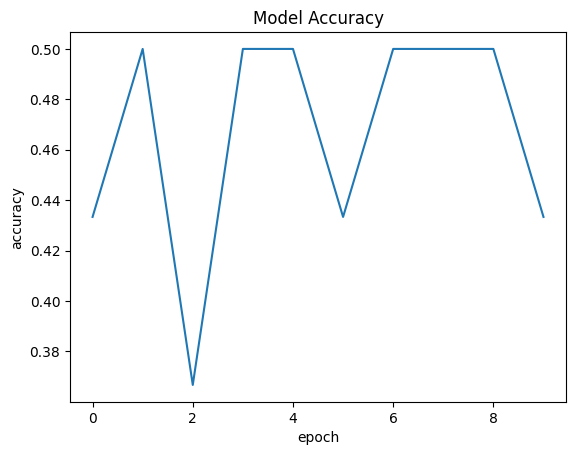

In [30]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

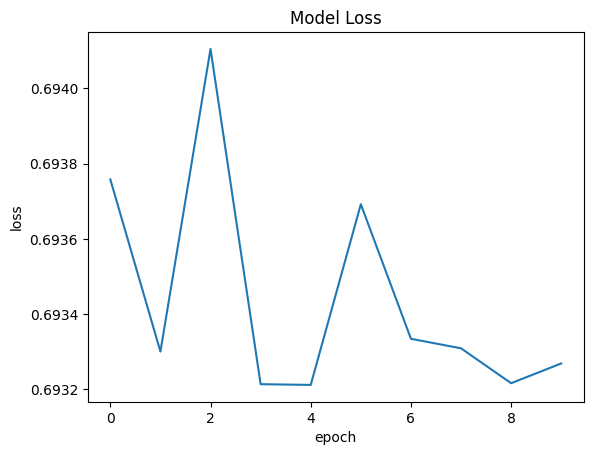

In [31]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [32]:
text = df["Text"]

In [33]:
#sent = [w.lower() for w in text.split() if not w in STOPWORDS]
trail_token = Tokenizer()
trail_token.fit_on_texts(text)
#word_index = trail_token.word_index
trail_seq = trail_token.texts_to_sequences(text)
#dict(list(word_index.items())[0:10])
trail_pad = pad_sequences(trail_seq,maxlen=100,padding='post')

In [34]:
trail_pad

array([[  2,  47,  21, ...,   0,   0,   0],
       [ 23,  49,  24, ...,   0,   0,   0],
       [ 52,  26,  53, ...,   0,   0,   0],
       ...,
       [ 15, 177,   3, ...,   0,   0,   0],
       [ 34,  45,   4, ...,   0,   0,   0],
       [ 46,  13, 182, ...,   0,   0,   0]])

### Step 7:

In [64]:
res = model.predict(trail_pad)
label = ['positive','negative']
print(res,label[np.argmax(trail_pad)>50])

2/2 [==============================] - 0s 25ms/step
[[0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]
 [0.4994854]] negative


C:\Users\HP\AppData\Local\Temp\ipykernel_7116\1535703611.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print(res,label[np.argmax(trail_pad)>50])


### Step 8:

### Model 2

In [65]:
model1 = Sequential()
# Embedding layer
model1.add(Embedding(5000,64,input_length=100))
model1.add(SimpleRNN(32,activation='tanh'))
model1.add(Embedding(5000,32,input_length=100))
model1.add(SimpleRNN(32,activation='tanh' ))
model1.add(Dense('1',activation='sigmoid'))

In [66]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 64)           320000    
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 32)                3104      
                                                                 
 embedding_11 (Embedding)    (None, 32, 32)            160000    
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 485,217
Trainable params: 485,217
Non-trainable params: 0
_________________________________________________________________


In [67]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [68]:
history1=model1.fit(train_padded,y_train,epochs=10,verbose=2,batch_size=15)

Epoch 1/10
2/2 - 5s - loss: 0.6983 - accuracy: 0.5000 - 5s/epoch - 2s/step
Epoch 2/10
2/2 - 0s - loss: 0.6950 - accuracy: 0.5000 - 87ms/epoch - 43ms/step
Epoch 3/10
2/2 - 0s - loss: 0.6932 - accuracy: 0.5000 - 74ms/epoch - 37ms/step
Epoch 4/10
2/2 - 0s - loss: 0.6936 - accuracy: 0.5000 - 68ms/epoch - 34ms/step
Epoch 5/10
2/2 - 0s - loss: 0.6940 - accuracy: 0.5000 - 112ms/epoch - 56ms/step
Epoch 6/10
2/2 - 0s - loss: 0.6933 - accuracy: 0.5000 - 111ms/epoch - 55ms/step
Epoch 7/10
2/2 - 0s - loss: 0.6931 - accuracy: 0.5000 - 71ms/epoch - 36ms/step
Epoch 8/10
2/2 - 0s - loss: 0.6933 - accuracy: 0.4667 - 80ms/epoch - 40ms/step
Epoch 9/10
2/2 - 0s - loss: 0.6945 - accuracy: 0.2667 - 70ms/epoch - 35ms/step
Epoch 10/10
2/2 - 0s - loss: 0.6931 - accuracy: 0.5000 - 63ms/epoch - 31ms/step


In [69]:
model1.evaluate(val_padded,y_val)

1/1 [==============================] - 1s 1s/step - loss: 0.6931 - accuracy: 0.5000


[0.6931478381156921, 0.5]

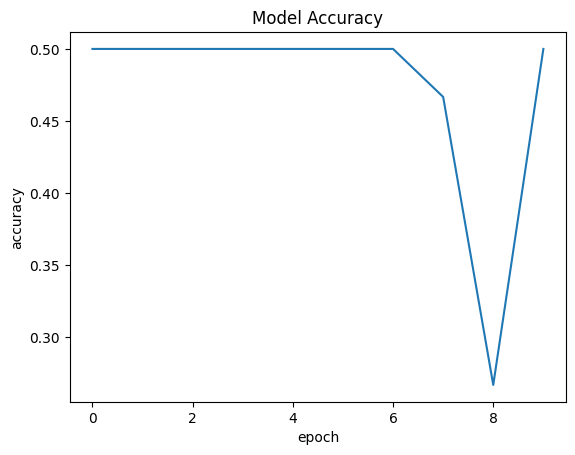

In [70]:
plt.plot(history1.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

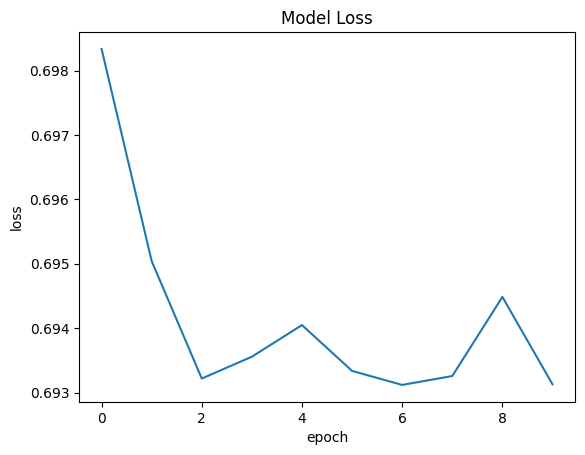

In [71]:
plt.plot(history1.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [72]:
res = model1.predict(trail_pad)
label = ['positive','negative']
print(res,label[np.argmax(trail_pad)>50])

2/2 [==============================] - 1s 50ms/step
[[0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]
 [0.49943614]] negative


C:\Users\HP\AppData\Local\Temp\ipykernel_7116\2701450631.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print(res,label[np.argmax(trail_pad)>50])


### Model 3

In [73]:
model2 = Sequential()
# Embedding layer
model2.add(Embedding(4000,128,input_length=100))
model2.add(SimpleRNN(64,activation='tanh'))
model2.add(Embedding(4000,128,input_length=100))
model2.add(SimpleRNN(64,activation='relu' ))
model2.add(Embedding(4000,128,input_length=100))
model2.add(SimpleRNN(64,activation='tanh' ))
model2.add(Dense('1',activation='sigmoid'))

In [74]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 100, 128)          512000    
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, 64)                12352     
                                                                 
 embedding_13 (Embedding)    (None, 64, 128)           512000    
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 64)                12352     
                                                                 
 embedding_14 (Embedding)    (None, 64, 128)           512000    
                                                                 
 simple_rnn_14 (SimpleRNN)   (None, 64)                12352     
                                                                 
 dense_6 (Dense)             (None, 1)                

In [75]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [76]:
history2=model2.fit(train_padded,y_train,epochs=10,verbose=2,batch_size=15)

Epoch 1/10
2/2 - 7s - loss: 0.7062 - accuracy: 0.4667 - 7s/epoch - 4s/step
Epoch 2/10
2/2 - 0s - loss: 0.7068 - accuracy: 0.3333 - 167ms/epoch - 83ms/step
Epoch 3/10
2/2 - 0s - loss: 0.6983 - accuracy: 0.5000 - 182ms/epoch - 91ms/step
Epoch 4/10
2/2 - 0s - loss: 0.6969 - accuracy: 0.5000 - 166ms/epoch - 83ms/step
Epoch 5/10
2/2 - 0s - loss: 0.6931 - accuracy: 0.5000 - 187ms/epoch - 94ms/step
Epoch 6/10
2/2 - 0s - loss: 0.6931 - accuracy: 0.5000 - 166ms/epoch - 83ms/step
Epoch 7/10
2/2 - 0s - loss: 0.6954 - accuracy: 0.3333 - 167ms/epoch - 84ms/step
Epoch 8/10
2/2 - 0s - loss: 0.6944 - accuracy: 0.4000 - 173ms/epoch - 87ms/step
Epoch 9/10
2/2 - 0s - loss: 0.6939 - accuracy: 0.5000 - 149ms/epoch - 75ms/step
Epoch 10/10
2/2 - 0s - loss: 0.6941 - accuracy: 0.5000 - 145ms/epoch - 72ms/step


In [77]:
model2.evaluate(val_padded,y_val)

1/1 [==============================] - 2s 2s/step - loss: 0.6933 - accuracy: 0.5000


[0.6932642459869385, 0.5]

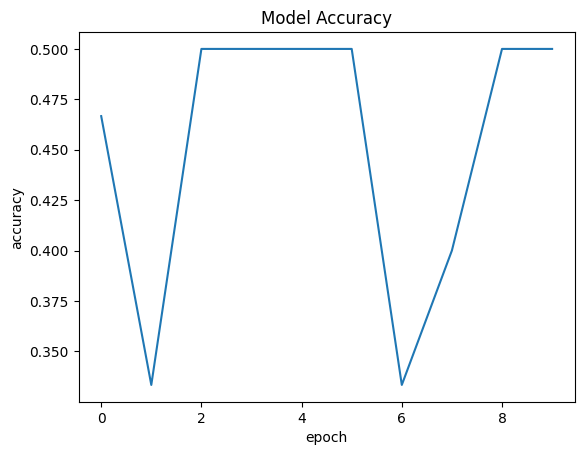

In [78]:
plt.plot(history2.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

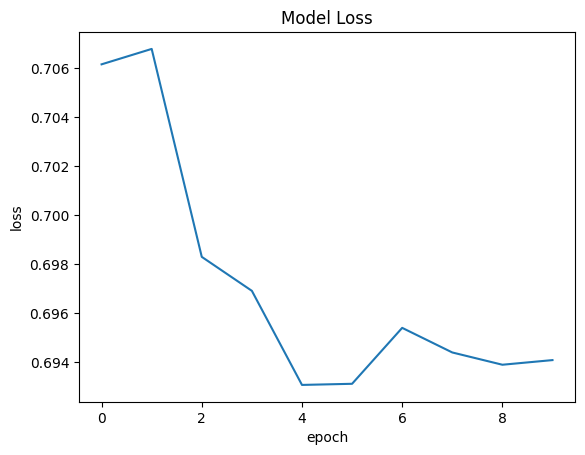

In [79]:
plt.plot(history2.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [80]:
res = model2.predict(trail_pad)
label = ['positive','negative']
print(res,label[np.argmax(trail_pad)>50])

2/2 [==============================] - 2s 45ms/step
[[0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]
 [0.49235067]] negative


C:\Users\HP\AppData\Local\Temp\ipykernel_7116\479605851.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print(res,label[np.argmax(trail_pad)>50])
